In [2]:
ls

 Volume in drive C is Windows
 Volume Serial Number is 869F-893B

 Directory of C:\Users\vanya\Desktop\lab\Thesis dissertation\Final versions\Untitled Folder

09/12/2017  01:12 PM    <DIR>          .
09/12/2017  01:12 PM    <DIR>          ..
09/12/2017  11:29 AM    <DIR>          .ipynb_checkpoints
09/12/2017  01:12 PM            79,482 code SVM_copd.ipynb
09/12/2017  11:33 AM           250,612 COPD data.xlsx
09/12/2017  12:59 PM           181,987 svr1.xlsx
               3 File(s)        512,081 bytes
               3 Dir(s)  140,754,305,024 bytes free


In [3]:
import pandas as pd


In [4]:
data = pd.read_excel("COPD data.xlsx")

In [5]:
data

,Primary ID,Activity increasing 1 to 3,20.50_100.0071,13.04_100.0127,18.91_100.0157,6.44_101.0054,17.18_101.0069,20.42_101.0079,13.33_101.0091,4.56_101.0093,...,14.73_1103.0706,15.45_1104.2050,16.78_1104.9366,18.25_1104.9609,1.54_1105.0190,1.72_1105.0543,11.40_1105.0599,16.75_1105.1992,6.25_1105.2039,14.27_1105.2581
0,oli_BG11_1,1,0.185809,0.000000,0.000000,0.675130,0.349221,0.861746,0.000000,0.000000,...,0.000000,0.000000,0.603189,0.000000,0.299688,0.000000,0.000000,0.472283,0.000000,0.00000
1,oli_BG11_2,1,0.000000,0.111154,0.298894,0.178744,0.988472,0.934429,0.761599,0.531901,...,0.123901,0.000000,0.000000,0.000000,0.000000,0.000000,0.225575,0.000000,0.000000,0.00000
2,oli_Lin_1,2,0.252089,0.000000,0.000000,0.059907,0.161149,0.253580,0.238817,0.143787,...,0.000000,0.144911,0.000000,0.098195,0.058754,0.033626,0.000000,0.053972,0.055397,0.07207
3,oli_Lin_2,2,0.035084,0.000000,0.027568,0.267914,0.177461,0.169619,0.177797,0.142990,...,0.000000,0.104538,0.104953,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
4,oli_Cr_1,3,0.081587,0.000000,0.000000,0.044250,0.078733,0.080151,0.333392,0.000000,...,0.055728,0.000000,0.000000,0.000000,0.037059,0.000000,0.040548,0.000000,0.000000,0.00000
5,oli_Cr_2,3,0.000000,0.085671,0.000000,0.000000,0.126500,0.000000,0.359735,0.000000,...,0.000000,0.039854,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000


In [6]:
data.keys()

Index(['Primary ID', 'Activity increasing 1 to 3', '20.50_100.0071',
       '13.04_100.0127', '18.91_100.0157', '6.44_101.0054', '17.18_101.0069',
       '20.42_101.0079', '13.33_101.0091', '4.56_101.0093',
       ...
       '14.73_1103.0706', '15.45_1104.2050', '16.78_1104.9366',
       '18.25_1104.9609', '1.54_1105.0190', '1.72_1105.0543',
       '11.40_1105.0599', '16.75_1105.1992', '6.25_1105.2039',
       '14.27_1105.2581'],
      dtype='object', length=4365)

In [126]:
shuffled_data = data.sample(frac=1)

In [127]:
y_train = shuffled_data['Activity increasing 1 to 3']

In [128]:
x_train = shuffled_data.iloc[:,2:]

In [129]:
from sklearn.svm import SVR

In [130]:
import sklearn
sklearn.__version__

'0.19.0'

In [131]:
svr_lin = SVR(kernel='linear', C=1e3)
svr_lin_weight = SVR(kernel='linear', C=1e3)

In [132]:
y_lin_weight = svr_lin.fit(x_train, y_train, sample_weight=weights).predict(x_train)

In [133]:
y_lin = svr_lin.fit(x_train, y_train).predict(x_train)
# svr_lin.fit(x, y, sample_weight=)

In [134]:
svr_lin.coef_.shape

(1, 4363)

In [135]:
svr_lin.coef_

array([[ -2.32710749e-08,  -1.76687974e-07,  -4.75115383e-07, ...,
         -4.84191188e-08,  -4.96975085e-08,  -6.46551155e-08]])

In [136]:
x_train.shape

(6, 4363)

<Container object of 4363 artists>

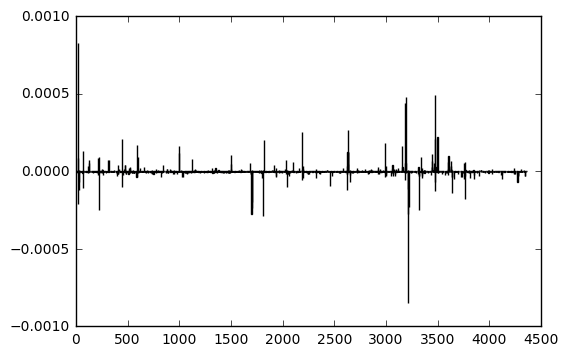

In [137]:
%matplotlib inline

import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.bar(range(x_train.shape[1]), svr_lin.coef_.squeeze())


In [138]:
svr_lin.support_vectors_.shape

(3, 4363)

<Container object of 4363 artists>

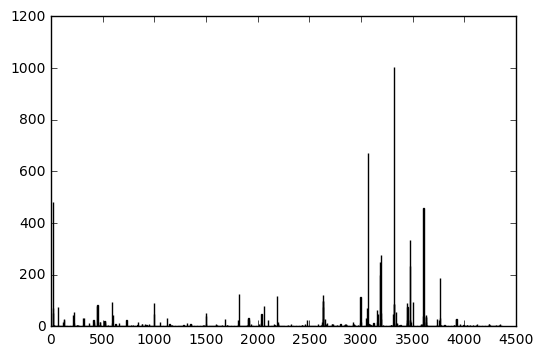

In [139]:
level3 = svr_lin.support_vectors_[2]
# change number to 1 and 0 for activity 2 and 1 respectively
level2 = svr_lin.support_vectors_[1]
level1 = svr_lin.support_vectors_[0]
fig, ax = plt.subplots()
ax.bar(range(x_train.shape[1]), level3.squeeze())


In [110]:
import numpy as np
l3id = pd.DataFrame(list(zip(data.keys()[2:],level3, 0 
                             svr_lin.coef_.squeeze())),
                    columns = ["chem", "SVC3", "SVC_coeff"]
                   )

SyntaxError: invalid syntax (<ipython-input-110-3b3b5e35ffeb>, line 3)

In [140]:
l3id[l3id["SVC_coeff"]>0].sort_values(by="SVC3", ascending=False)

,chem,SVC3,SVC_coeff
3063,16.96_433.1068,651.489600,4.461197e-05
3604,17.48_493.1334,432.551700,6.042824e-05
3472,17.01_479.1176,180.226700,2.089164e-04
3192,14.81_449.1155,127.528800,4.773064e-04
3448,17.40_477.1413,67.212060,1.117411e-04
3056,16.99_432.1074,58.268950,1.388475e-05
3449,19.31_477.1530,58.227940,6.896671e-05
3474,13.48_479.1215,55.645920,4.912398e-04
3602,15.67_493.1226,53.301290,1.425474e-05
995,20.67_655.1701,38.801170,1.616041e-04


In [112]:
pd.DataFrame?

In [63]:
level3.shape

(4363,)

In [64]:
svr_lin?

In [115]:
import sklearn
sklearn.__version__

'0.19.0'

In [86]:
l3id.to_excel("svr1_w.xlsx")

PermissionError: [Errno 13] Permission denied: 'svr1_w.xlsx'

In [121]:
weights = shuffled_data['Activity increasing 1 to 3']

In [122]:
weights = weights.replace(3, .40)

In [123]:
weights = weights.replace(2, .20)

In [124]:
weights = weights.replace(1, .40)

In [125]:
weights

2    0.2
3    0.2
5    0.4
4    0.4
1    0.4
0    0.4
Name: Activity increasing 1 to 3, dtype: float64